# Supplementary Materials 1: Harmonic Grammar

In Part 1, we briefly introduce Harmonic Grammar (HG), "a connectionist-based grammar formalism" (Hale & Smolensky, 2016), and show how to translate context-free grammars into harmonic grammars which can be easily implemented in a gradient symbolic computation model. We will go through a simple example to cover rather informally many issues that you may encounter when applying this formalism to your own case. For formal descriptions of HG, see Hale and Smolensky (2016). 

* Hale, J., & Smolensky, P. (2006). Harmonic Grammars and harmonic parsers for formal languages. In P. Smolensky & G. Legendre (Eds.), *The harmonic mind: From neural computation to optimality-theoretic grammar. Volume I: Cognitive architecture (pp. 393–416)*. The MIT Press.

### An example grammar

Consider a grammar G, consisting of the following set of rewrite rules:

* Rule 1: S $\rightarrow$ A B
* Rule 2: S $\rightarrow$ C X
* Rule 3: X $\rightarrow$ D E

where symbols A, B, C, D, E are terminal symbols and symbols X and S are non-terminal symbols. S is a starting symbol. G generates two sequences of symbols (henceforth, sentences) S1='A B' and S2='C D E'. Adopting a conventional view, we assume that the comprehension of the sentences requires building the underlying tree structures: T1=[$_\mathrm{S}$ A B] and T2=[$_\mathrm{S}$ C [$_\mathrm{X}$ D E]]. 

### Role decomposition

<center><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_SzdhLUJPNjNzZVE" style="height: 180px;"><br>
Figure 1. The parse of S2='C D E' given G.</center>

Figure 1 presents T2, the interpretation of S2. Note that we assigned a unique label to each of the unique positions/slots/variables/**roles** of the tree. Role $\texttt{r}$ stands for 'root'. Role $\texttt{0x}$ and $\texttt{1x}$ indicate the left and right (or more generally, the first and the second) daughters of their mother $\texttt{x}$, any arbitrary role. For example, $\texttt{01r}$ denotes the left daughter of the right daughter of the root node. By applying the labeling scheme recursively, we can get unique node labels for a tree of any depth. We refer to these as **recursive roles**. Note that the scheme generalizes to $n$-ary branching for any $n$, although currently the software supports only binary branching. A value (or **filler**) $\texttt{X}$ occupies (or is bound to) the role $\texttt{1r}$ to form a **filler/role binding** (or simply, f/r binding) $\texttt{X/1r}$. Once we assign unique labels to unique roles, we can describe T2 as an unordered set of f/r bindings {$\texttt{X/1r}$, $\texttt{S/r}$, $\texttt{E/11r}$, $\texttt{C/0r}$, $\texttt{D/01r}$} and this process is called **role decomposition** (for formal descriptions, see Smolensky, 1990). Note that the connectivity pattern is captured implicitly by the role names. For example, we know $\texttt{E}$ is the right daughter of $\texttt{X}$ because (i) $\texttt{X}$ is bound to $\texttt{1r}$ and $\texttt{E}$ is bound to $\texttt{11r}$ and (ii) $\texttt{11r}$ is the right daughter position of $\texttt{1r}$  

### Grammar as a set of local constraints

We can say a global structure T2 is grammatical because every local mother-daughter relation in the tree, ($\texttt{S/r}$, $\texttt{C/0r}$), ($\texttt{X/1r}$, $\texttt{E/11r}$), etc., is grammatical. 
From this perspective, we consider $n$ local constraints for each $n$-ary branching rule, one for each mother-daughter relation. For example, we consider two *independent* local constraints from Rule 1 (see Figure 2a and 2b). The motivation of breaking each rewrite rule into multiple pairwise relations is that this pairwise relationship (related to the correlation) can be implemented into a localist connectionist model very easily. For example, we can assign a processing unit to each f/r binding and then add a bidirectional, excitatory connection for every pair of mother-daughter bindings. Whenever one is activated, it will try to activate the other. We will show how the constraints specified for local representations of bindings can be converted to the equivalent ones for distributed representations of bindings in Part 3.

But there is a problem in this idea. Because every local constraint is independent of every other local constraint, there is no way to monitor global coherence. In the current example, the system working on local constraints cannot reject a tree [$_\mathrm{S}$ C B] as ill-formed because each pairwise relation is grammatical (see Figure 2b and 2c). 

<center><br><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_ZEtPMXljcHJDaDg" style="height: 120px;"><br>
Figure 2. Local constraints from Rule 1 (a and b) and Rule 2 (c)</center>

### Harmonic normal form

To avoid this problem, Hale and Smolensky (2006) propose the **harmonic normal form** (HNF) for context-free grammars. Simply speaking, we replace each rewrite rule with a nonterminal symbol on the left A $\rightarrow$ B C into two separate rules A $\rightarrow$ A[i], A[i] $\rightarrow$ B C. The HNF conversion of G, HNF(G), is as follows:

* S $\rightarrow$ S[1]
* S $\rightarrow$ S[2]
* S[1] $\rightarrow$ A B
* S[2] $\rightarrow$ C X
* X $\rightarrow$ X[1]
* X[1] $\rightarrow$ D E

Now the parses of the two sentences of G are T1=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]] and T2=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [C [$_\mathrm{X}$ [$_\mathrm{X[1]}$ D E]]]]]. With role decomposition, T2 can be described as {$\texttt{S/r}$, $\texttt{S[2]/0r}$, $\texttt{C/00r}$, $\texttt{X/10r}$, $\texttt{X[1]/010r}$, $\texttt{D/0010r}$, $\texttt{E/1010r}$}. 

### Itemification 

It is important to keep in mind that every rewrite rule is context-free. For example, Rule 3 simply says X has D as its left-daughter and E as its right-daughter. In HNF, X has X[1] as its first daughter and X[1] has D and E as its first and second daughters. It does not matter where X occurs. Figure 3 presents two different instantiations of the local tree [$_\mathrm{X}$ [$_\mathrm{X[1]}$ [D E]]. According to Rule 3, both local structures are equally well-formed. To capture the context-free property, we need to consider every possible instantiation for a given local constraint. For example, for a context-free local constraint between a pair of bindings ($\texttt{X[1]/x, D/1x}$) where $\texttt{x}$ is any arbitrary role, we need to consider every unique instance of the constraint: one for ($\texttt{X[1]/0r, D/10r}$) and one for ($\texttt{X[1]/010r, D/1010r}$). We do not consider local constraints for ($\texttt{X[1]/r, D/0r}$) and ($\texttt{X[1]/10r, D/010r}$), assuming that a single daughter of a mother plays a different (relative) role from the first of $n$ daughters of a mother. We refer to the process of generating specific local constraints from context-free local constraints as *itemification*. 

<center><br><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_THBSWGpDbDNUN0U" style="height: 300px;"><br>
Figure 3. Context-free property of the constraints specified by Rule 3 of G<br></center>

### Span roles

So far we have used recursive roles to specify particular positions in a tree relative to its root node. This labeling system is not appropriate for parsing problems. In general, a filler can be bound to multiple terminal roles (although there is a unique binding of each terminal filler to a role in our example grammar G) so there is no easy way for a parser to choose a target binding for a given filler. For this reason, we use a different role system, called **span roles**, for parsing problems. 

Span roles specify unique positions in a tree relative to its terminals as opposed to its root. Because the terminals are linearly ordered, we can put the position information into role labels. The left-most terminal node is given a span role $\texttt{(0,1)}$ which indicates that a filler occupying the role spans from position 0 to 1 (see Figure 4a). The second terminal node is given a label $\texttt{(1,2)}$ and so on. Once we assign the labels to terminal nodes, we can easily specify any node in a tree relative to the terminal roles.

More generally, a span role $\texttt{(i,j)}$ indicates that a filler bound to the role spans from i to j in a sentence. The filler is either a terminal symbol or a non-terminal symbol that has a single daughter (the bracketed filler symbols introduced by the HNF conversion). A span role $\texttt{(i,j,k)}$ indicates that a filler occupying the role spans from i to k and has two daughters, one spanning from i to j and one spanning from j to k. Figure 4a shows how the span roles work. 

We can re-represent the structure (Figure 4a) in a graph (Figure 4b) based on the relationship between span roles. For example, a node with label $\texttt{(0,1,3)}$ has a node with label $\texttt{(0,1)}$ as its left daughter. It is clear that the same tree structure can be described with either span roles (Figure 4b) or recursive roles (Figure 4c).

<center><br><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_YUVGNzJUb3dsaHc" style="height: 300px;"><br>
Figure 4. Equivalence of recursive and span role systems<br></center>

### Empty filler

When we design a parser for a given grammar, we need to consider not just a set of span roles required to describe one structure (e.g., T2) but also a set of span roles required to describe every other grammatical structure. Figure 5 shows how T1 and T2 can be role-decomposed. Each row corresponds to a unique span role. One thing to note is that there are some unused roles for each structure. For example, the third terminal role $\texttt{(2,3)}$ is not needed for T1. How can we encode such empty roles? A natural solution is to let each empty role be "empty". Another, apparently less natural, solution is to introduce a null filler symbol (e.g., $\texttt{_}$) and bind it to each empty role. Currently, the GSC software takes the second approach. In terms of neural representation, the binding of a null filler with a role is not as unnatural as it looks at first sight. It should be noted that some span roles may be possible given a maximal sentence length but may not be required for any sentence in a language (e.g., $\texttt{(0,1,3)}$ for G). In this case, we can prune the unused span roles, although that is not necessary.

<center><br><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_OG1rcGdmTnZRUnc" style="height: 500px;"><br>
Figure 5. An empty role is represented as a binding of a null filler with the role.</center>

### Harmonic grammar

Once we view a grammar as a set of local constraints, a natural way to judge the grammaticality of a sentence is to check that every local constraint is satisfied. For example, a sentence S3='C B' is ungrammatical because $\texttt{C/(0,1)}$ needs $\texttt{S[2]/(0,1,2)}$ and $\texttt{B/(1,2)}$ needs $\texttt{S[1]/(0,1,2)}$ but two different fillers $\texttt{S[1]}$ and $\texttt{S[2]}$ cannot share the same role $\texttt{(0,1,2)}$ in a discrete structure. 

For this purpose, let us assign a number to every pair of f/r bindings as a measure of well-formedness (called **harmony**). 

* Binary HG rules: $H_G(f_i/r_j, f_k/r_l) = w$ where $(i,j) \neq (k,l)$.

where $w$ = 2 if $f_i$ is a legitimate mother or daughter of $f_k$ and $w$ = 0 otherwise. For example, $H_G(\texttt{S[2]/0r}, \texttt{C/00r}) = H_G(\texttt{S[2]/010r}, \texttt{S[2]/0010r}) = 2$ because $\texttt{C}$ is a legitimate left daughter of $\texttt{S[2]}$. (Note that for a context-free grammar, a harmonic grammar can be specified before role decomposition. Because our goal is to implement a harmonic grammar into a connectionist model, it is better to think of the rules of HG in terms of specific bindings.) Then, the harmony value of a whole tree structure T can be defined as follows.

* $H_G(T) = 0.5 \sum_{i,j,k,l}{H_G(f_i/r_j, f_k/r_l)}$ where $(i,j) \neq (k,l)$. 

We multiply 0.5 to the sum because every pair of binding is counted twice. For T1=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]] and T3=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [C B]]], $H_G$(T1) = 6 and $H_G$(T3) = 4. Thus, the rules seem to assign a higher harmony value to a grammatical structure than to an ungrammatical structure.

A problem in this method is that, for any grammatical structure T$_i$, $H_G$(T$_i$) < $H_G$(T$_j$) if T$_i$ has a smaller number of grammatical mother-daughter pairs than T$_j$ regardless of whether T$_j$ is grammatical or not. Consider T4=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ A [$_\mathrm{X}$ [$_\mathrm{X[1]}$ D E]]]]. Then, $H_G$(T3) < $H_G$(T1) < $H_G$(T4) < $H_G$(T2) when T1 and T2 are grammatical but T3 and T4 are ungrammatical. Ideally, we want a set of HG rules such that (i) all grammatical structures have the same harmony value which is higher than the harmony value of every ungrammatical structure; (ii) some ungrammatical structures have higher harmony values than other ungrammatical structures. The second condition is needed to capture the gradedness of the well-formedness of a structure. 

A simple solution is to penalize a binding $f_i/r_j$ by assigning a negative number to the binding if it does not have a legitimate mother or daughter in a tree T because T must be ill-formed. 

* Unary HG rules: $H_G(f_i/r_j) = b_{(i,j)}$
* $H_G$(T) = $0.5\sum_{i,j,k,l}{H_G(f_i/r_j, f_k/r_l)} + \sum_{i,j}{H_G(f_i/r_j)}$ 

We set $b_{(i,j)}$ to -$k$ where $k$ indicates the number of legitimate mother and daughters that a filler $f_i$ can have. Every terminal filler must have a single mother and must not have any daughter. Thus, $k$ = 1. A starting symbol must have a single daughter (under HNF conversion) so $k$ = 1. Every bracketed filler (under HNF conversion) must have a single mother and a single daughter so $k$ = 2. Every non-terminal filler (except for the starting symbol) must have a single mother and $n$ daughters (for $n$-ary branching; in our example, $n$=2) so $k$ = $n$ + 1. Hale and Smolensky (2006; p. 400) shows formally that, with these HG rules, $H_G$(T) = 0 if T is grammatical and $H_G$(T) < 0 if T is ungrammatical. In addition, an ungrammatical structure violating fewer soft rules has a higher (less negative) harmony than another ungrammatical structure violating more soft rules. Note that the HG rules do not penalize an ungrammatical pair of bindings by assigning a negative number to the pair. Instead, the HG penalizes the presence of every binding in a tree and then cancels these negative harmony values by assigning a positive harmony value for every grammatical pair of bindings.

### How to use the GSC software to implement a context-free grammar

In [1]:
%matplotlib inline
import gsc

Specify a set of rewrite rules in G as follows. Each separate rule is separated by a semicolon. 

In [2]:
cfg1 = 'S -> A B; S -> C X; X -> D E'

Now construct an object of the HarmonicGrammar class. It will convert a given context-free grammar into the harmonic normal form and then construct a set of binary and unary HG rules. The cfg and size arguments must be set manually. When span roles are used, the size argument is the number of terminal roles in the model. Please set it to the maximal length of a sentence. [Note: (i) there is nothing wrong with setting it greater than the maximal sentence length. (ii) If your grammar has recursive rules, the levels of embedding will be limited to a certain level.] If the unary_base argument is set to 'filler', then the same harmony value will be assigned to every binding of a filler with every role as we described in the Harmonic Grammar section. The default value of the argument is 'binding' and in the default setting, the harmony values of unused f/r bindings will be set to a large negative value (by default, -5).

In [3]:
hg1 = gsc.HarmonicGrammar(cfg=cfg1, size=3, unary_base='filler')

In [4]:
# print the grammar in HNF 
print(hg1.grammar.hnfRulesToString())

{S -> S[1]; 
 S -> S[2]; 
 S[1] -> A B; 
 S[2] -> C X; 
 X -> X[1]; 
 X[1] -> D E}


In [5]:
print(hg1.filler_names)

['A', 'B', 'C', 'D', 'E', 'S', 'S[1]', 'S[2]', 'X', 'X[1]', '_']


In [6]:
print(hg1.role_names)

['(0,1)', '(1,2)', '(2,3)', '(0,1,2)', '(1,2,3)', '(0,2)', '(1,3)', '(0,1,3)', '(0,2,3)', '(0,3)']


In [7]:
# Print HG rules with itemification
hg1.read_rules()

Binary rules:

H(S/(0,2), S[1]/(0,1,2)) = 2.0
H(S/(1,3), S[1]/(1,2,3)) = 2.0
H(S/(0,3), S[1]/(0,1,3)) = 2.0
H(S/(0,3), S[1]/(0,2,3)) = 2.0
H(S[1]/(0,1,2), A/(0,1)) = 2.0
H(S[1]/(1,2,3), A/(1,2)) = 2.0
H(S[1]/(0,1,3), A/(0,1)) = 2.0
H(S[1]/(0,2,3), A/(0,2)) = 2.0
H(S[1]/(0,1,2), B/(1,2)) = 2.0
H(S[1]/(1,2,3), B/(2,3)) = 2.0
H(S[1]/(0,1,3), B/(1,3)) = 2.0
H(S[1]/(0,2,3), B/(2,3)) = 2.0
H(S/(0,2), S[2]/(0,1,2)) = 2.0
H(S/(1,3), S[2]/(1,2,3)) = 2.0
H(S/(0,3), S[2]/(0,1,3)) = 2.0
H(S/(0,3), S[2]/(0,2,3)) = 2.0
H(S[2]/(0,1,2), C/(0,1)) = 2.0
H(S[2]/(1,2,3), C/(1,2)) = 2.0
H(S[2]/(0,1,3), C/(0,1)) = 2.0
H(S[2]/(0,2,3), C/(0,2)) = 2.0
H(S[2]/(0,1,2), X/(1,2)) = 2.0
H(S[2]/(1,2,3), X/(2,3)) = 2.0
H(S[2]/(0,1,3), X/(1,3)) = 2.0
H(S[2]/(0,2,3), X/(2,3)) = 2.0
H(X/(0,2), X[1]/(0,1,2)) = 2.0
H(X/(1,3), X[1]/(1,2,3)) = 2.0
H(X/(0,3), X[1]/(0,1,3)) = 2.0
H(X/(0,3), X[1]/(0,2,3)) = 2.0
H(X[1]/(0,1,2), D/(0,1)) = 2.0
H(X[1]/(1,2,3), D/(1,2)) = 2.0
H(X[1]/(0,1,3), D/(0,1)) = 2.0
H(X[1]/(0,2,3), D/(0,2))

The asterisk in the unary rules above indicates that any arbitrary role may appear in place of \*. Once we have an object of the HarmonicGrammar class (e.g., hg1 in the present example), it is very easy to construct a model implementing the HG rules.

In [8]:
net = gsc.GscNet(hg=hg1)

In [9]:
net.read_state()  # read activation values of all bindings; initially, it is set to a random vector
# Details of these values will be explained in Part 2.

         (0,1)     (1,2)     (2,3)   (0,1,2)   (1,2,3)     (0,2)     (1,3)  \
A     0.433538  0.744277  0.723308  0.362864  0.590561  0.292148  0.230150   
B     0.974397  0.476964  0.698830  0.273826  0.069542  0.802408  0.561303   
C     0.796435  0.167080  0.414777  0.938210  0.511443  0.308042  0.024131   
D     0.926131  0.939076  0.593660  0.485184  0.530554  0.626076  0.359832   
E     0.980444  0.630209  0.917405  0.042145  0.804934  0.134432  0.709216   
S     0.266701  0.930476  0.848594  0.758946  0.846923  0.108567  0.544404   
S[1]  0.080257  0.847041  0.763000  0.471308  0.936531  0.251711  0.385481   
S[2]  0.091393  0.767795  0.755992  0.860246  0.084464  0.636733  0.886639   
X     0.042619  0.960159  0.246967  0.675564  0.092249  0.765712  0.737719   
X[1]  0.298782  0.051313  0.070727  0.539045  0.334602  0.643992  0.460999   
_     0.134432  0.092511  0.258863  0.427172  0.051728  0.360157  0.466605   

       (0,1,3)   (0,2,3)     (0,3)  
A     0.368131  0.486616  

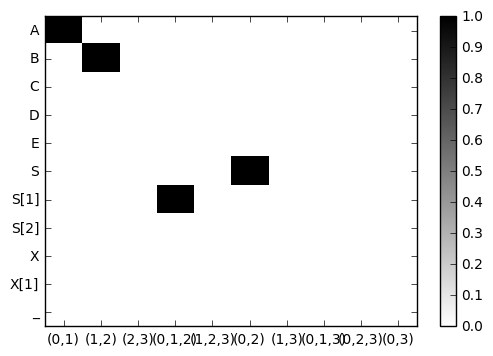

In [10]:
# Let us set the model's activation state to a state representing a grammatical discrete structure T1
T1 = ['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)']
net.set_state(T1, 1.0)     # Set the activation value of every binding in T1 to 1. Others will be set to 0.  
net.plot_state()           # check whether the state was set as intended.

In [11]:
# Compute harmony value at the present state. 
print('Harmony value of T1:', net.H0())

Harmony value of T1: -1.7763568394e-15


Given the precision issue, the number should be treated as 0. (As we said earlier in this tutorial, the model internally creates distributed representations of f/r bindings and sets the weight and bias values based on the distributed representations, although most methods of the GscNet class will automatically convert back to the local representation version when it reports the result for interpretability.)

In [12]:
T2 = ['S/(0,3)', 'S[2]/(0,1,3)', 'C/(0,1)', 'X/(1,3)', 'X[1]/(1,2,3)', 'D/(1,2)', 'E/(2,3)']
net.set_state(T2, 1.0)
print('Harmony value of T2:', net.H0())

Harmony value of T2: -3.5527136788e-15


Both T1 and T2 are grammatical and have the same harmony value of 0.

In [13]:
T3 = ['S/(0,2)', 'C/(0,1)', 'S[2]/(0,1,2)', 'B/(1,2)']
net.set_state(T3, 1.0)
print('Harmony value of T3:', net.H0())

Harmony value of T3: -2.0


An ungrammatical structure T3 has a harmony value smaller than 0.

In [14]:
T4 = ['S/(0,3)', 'S[2]/(0,1,3)', 'A/(0,1)', 'X/(1,3)', 'X[1]/(1,2,3)', 'D/(1,2)', 'E/(2,3)']
T5 = ['S/(0,3)', 'S[2]/(0,1,3)', 'A/(0,1)', 'X/(1,3)', 'X[1]/(1,2,3)', 'B/(1,2)', 'E/(2,3)']
net.set_state(T4, 1.0)
print('Harmony value of T4:', net.H0())
net.set_state(T5, 1.0)
print('Harmony value of T5:', net.H0())

Harmony value of T4: -2.0
Harmony value of T5: -4.0


Two ungrammatical structures T4 and T5 have different harmony values. T4 is more well-formed than T5 because T4 satisfies more local constraints than T5. In T4, a pair of bindings $\texttt{S[2]/(0,1,3)}$ and $\texttt{A/(0,1)}$ is ill-formed. In T5, two pairs of bindings are ill-formed: $\texttt{S[2]/(0,1,3)}$ and $\texttt{A/(0,1)}$ as well as $\texttt{X[1]/(1,2,3)}$ and $\texttt{B/(1,2)}$. 

### Manual implementation of HG rules

It may be that the desired HG is not one that can be automatically generated from a CFG as above (for instance, different strengths might be desired for different rules, achieving an effect like a PCFG; then different values would be desired for the connections implementing the different rules). In that case, it is possible to create the HG manually. Although it is not  necessary for the HG we now create, for illustration, we will manually implement the HG rules of another context-free grammar G2 = {S $\rightarrow$ A B; S $\rightarrow$ X Y}. We chose G2 to avoid implementing manually-itemified HG rules, which can be tedious and error-prone. Itemification is not necessary for this special case because there is only one tree location where each rule can be instantiated, once we set the width of the terminal string to 2.

First, we need to consider what fillers and roles are required to handle the grammar. A null filler will be included as well, although it is not required for G2 in particular. 

In [15]:
encodings1 = {  # Python dictionary
    'filler_names': ['A', 'B', 'X', 'Y', 'S[1]', 'S[2]', 'S', '_'],
    'role_names': ['(0,1)', '(1,2)', '(0,1,2)', '(0,2)']
}

In [16]:
net2 = gsc.GscNet(encodings=encodings1)

net2 contains units for every possible binding between a filler and a role.
We next implement binary HG rules as weights of connections between these f/r bindings. 

In [17]:
# Binary HG rules are implemented as the weights of connections
# S -> S[1]
net2.set_weight('S/(0,2)', 'S[1]/(0,1,2)', 2.0)   # H_G(S/(0,2), S[1]/(0,1,2)) = 2
# S -> S[2]
net2.set_weight('S/(0,2)', 'S[2]/(0,1,2)', 2.0)
# S[1] -> A B
net2.set_weight('S[1]/(0,1,2)', 'A/(0,1)', 2.0)
net2.set_weight('S[1]/(0,1,2)', 'B/(1,2)', 2.0)
# S[2] -> X Y
net2.set_weight('S[2]/(0,1,2)', ['X/(0,1)', 'Y/(1,2)'], 2.0)  # more compactly.

We now implement unary HG rules as bias values assigned to f/r bindings.

In [18]:
# Unary HG rules
net2.set_filler_bias('A', -1.)  # Terminal fillers must have a single mother and cannot have any daughter
net2.set_filler_bias('B', -1.)
net2.set_filler_bias(['X', 'Y'], -1) # more compactly
net2.set_filler_bias(['S[1]', 'S[2]'], -3.)  # Bracketed fillers must have a single mother and two daughters
net2.set_filler_bias('S', -1.)  # the starting symbol must have a single daughter (its bracketed version) and no mother.

In [19]:
# Update the bowl strength (we will explain this in Part 3)
# For the present example, we do not need to run this command
net2.update_bowl_strength()

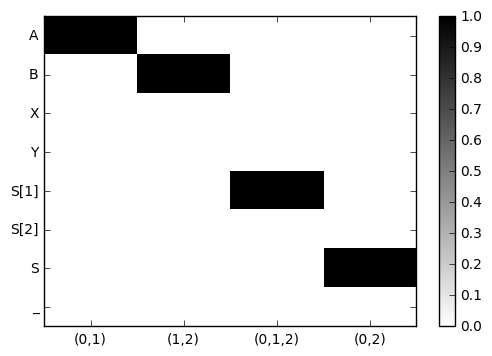

In [20]:
T1 = ['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)']
net2.set_state(T1, 1.)
net2.plot_state()

In [21]:
print('Harmony of T1:', net2.H0())

Harmony of T1: 8.881784197e-16
